# --- Day 9: Smoke Basin ---

These caves seem to be lava tubes. Parts are even still volcanically active; small hydrothermal vents release smoke into the caves that slowly settles like rain.

If you can model how the smoke flows through the caves, you might be able to avoid it and be that much safer. The submarine generates a heightmap of the floor of the nearby caves for you (your puzzle input).

Smoke flows to the lowest point of the area it's in. For example, consider the following heightmap:

```
2<1>9994321<0>
3987894921
98<5>6789892
8767896789
989996<5>678
```

Each number corresponds to the height of a particular location, where 9 is the highest and 0 is the lowest a location can be.

Your first goal is to find the low points - the locations that are lower than any of its adjacent locations. Most locations have four adjacent locations (up, down, left, and right); locations on the edge or corner of the map have three or two adjacent locations, respectively. (Diagonal locations do not count as adjacent.)

In the above example, there are four low points, all highlighted: two are in the first row (a 1 and a 0), one is in the third row (a 5), and one is in the bottom row (also a 5). All other locations on the heightmap have some lower adjacent location, and so are not low points.

The risk level of a low point is 1 plus its height. In the above example, the risk levels of the low points are 2, 1, 6, and 6. **The sum of the risk levels of all low points in the heightmap is therefore 15**.

**Find all of the low points on your heightmap. What is the sum of the risk levels of all low points on your heightmap**?


In [1]:
import numpy as np

In [2]:
# Covert input into a numpy matrix
test_input = [
    "2199943210",
    "3987894921",
    "9856789892",
    "8767896789",
    "9899965678"
]

for idx, numstr in enumerate(test_input):
    test_input[idx] = [int(char) for char in numstr]

test_input = np.array(test_input)

In [3]:
def is_lowest(row, col, heightmap):
    """Check if value is the lower than its adjacent values"""
    val = heightmap[row, col]
    
    adjacent_values = []
    # Below
    if row+1 < len(heightmap):
        adjacent_values.append(heightmap[row+1, col])

    # Above
    if row-1 >= 0:
        adjacent_values.append(heightmap[row-1, col])

    # Right
    if col+1 < len(heightmap[0]):
        adjacent_values.append(heightmap[row, col+1])

    # Left
    if col-1 >= 0:
        adjacent_values.append(heightmap[row, col-1])

    # If `val` is less than the smallest adjacent value,
    # return `True`
    if val < min(adjacent_values):
        return True

    # Otherwise, it is not a low point, and we return `False`
    return False

In [4]:
def sum_of_lowest(puzzle_input):
    
    if not isinstance(puzzle_input, np.ndarray):
        raise Exception("Input puzzle must be a numpy array!")
    
    num_rows = len(puzzle_input)
    num_cols = len(puzzle_input[0])

    lowest_vals = []
    row_vals = []
    col_vals = []

    for row in range(num_rows):
        for col in range(num_cols):
            if is_lowest(row, col, puzzle_input):
                lowest_vals.append(puzzle_input[row,col]+1)
    return sum(lowest_vals)#, row_vals, col_vals

In [5]:
test_input[0,9]

0

In [6]:
known_answer = 15
answer = sum_of_lowest(test_input)

if known_answer == answer:
    print("Looks like its working!!")
else:
    print("There is something wrong... :(")

Looks like its working!!


In [7]:
data_file = "../data/09_data.txt"

with open(data_file, "r") as f:
    puzzle_input = [line.rstrip("\n") for line in f]

for idx, numstr in enumerate(puzzle_input):
    puzzle_input[idx] = [int(char) for char in numstr]

puzzle_input = np.array(puzzle_input)
    
answer = sum_of_lowest(puzzle_input)
answer

560

# --- Part Two ---

Next, you need to find the largest basins so you know what areas are most important to avoid.

A basin is all locations that eventually flow downward to a single low point. Therefore, every low point has a basin, although some basins are very small. Locations of height 9 do not count as being in any basin, and all other locations will always be part of exactly one basin.

The size of a basin is the number of locations within the basin, including the low point. The example above has four basins.

The top-left basin, size 3:

```
2199943210
3987894921
9856789892
8767896789
9899965678
```

The top-right basin, size 9:

```
2199943210
3987894921
9856789892
8767896789
9899965678
```

The middle basin, size 14:

```
2199943210
3987894921
9856789892
8767896789
9899965678
```

The bottom-right basin, size 9:

```
2199943210
3987894921
9856789892
8767896789
9899965678
```

Find the three largest basins and multiply their sizes together. In the above example, this is 9 * 14 * 9 = 1134.

**What do you get if you multiply together the sizes of the three largest basins?**


In [8]:
groups = []

def count_groups(row, col, puzzle):
    """
    Count the size of a group starting at location puzzle[row,col].
    
    Function returns if it is within bounds, has not been checked already
    (i.e., has value of -1), and recursively expands to adjacent locations.
    """
    
    # Out of bounds
    if (col < 0):
        return
    if (col >= len(puzzle[0])):
        return 
    if (row < 0):
        return
    if (row >= len(puzzle)):
        return
    
    # Boundary location
    if (puzzle[row][col] == 9):
        return
    
    # Already checked this
    if (puzzle[row][col] == -1):
        return
    
    # If we get this far, mark it as being checked by changing value to -1
    puzzle[row][col] = -1
    
    groups[len(groups)-1] += 1         # Increment size of group by one
    count_groups(row+1, col, puzzle)   # Go down
    count_groups(row-1, col, puzzle)   # Go up
    count_groups(row, col+1, puzzle)   # Go right
    count_groups(row, col-1, puzzle)   # Go left

def get_part2(puzzle):
    """
    Iterate through every location in the height map, create a new group, but only
    increment the size if it's an area we haven't searched already.
    """
    for row in range(0, len(puzzle)):
        for col in range(0, len(puzzle[0])):
            groups.append(0)
            count_groups(row, col, puzzle)

    return np.prod(sorted(groups, reverse=True)[:3])  # Sort groups, taking the largest three

### Run it on the test input

In [9]:
# Covert input into a numpy matrix
test_input = [
    "2199943210",
    "3987894921",
    "9856789892",
    "8767896789",
    "9899965678"
]

for idx, numstr in enumerate(test_input):
    test_input[idx] = [int(char) for char in numstr]

test_input = np.array(test_input)

known_answer = 1134
answer = get_part2(test_input)

if known_answer == answer:
    print("Looks like its working!!")
else:
    print("There is something wrong... :(")

Looks like its working!!


### Run it on the puzzle file

In [10]:
data_file = "../data/09_data.txt"

with open(data_file, "r") as f:
    puzzle_input = [line.rstrip("\n") for line in f]

for idx, numstr in enumerate(puzzle_input):
    puzzle_input[idx] = [int(char) for char in numstr]

puzzle_input = np.array(puzzle_input)
    
answer = get_part2(puzzle_input)
answer

959136

In [11]:
import seaborn as sns

In [12]:
import matplotlib.pyplot as plt

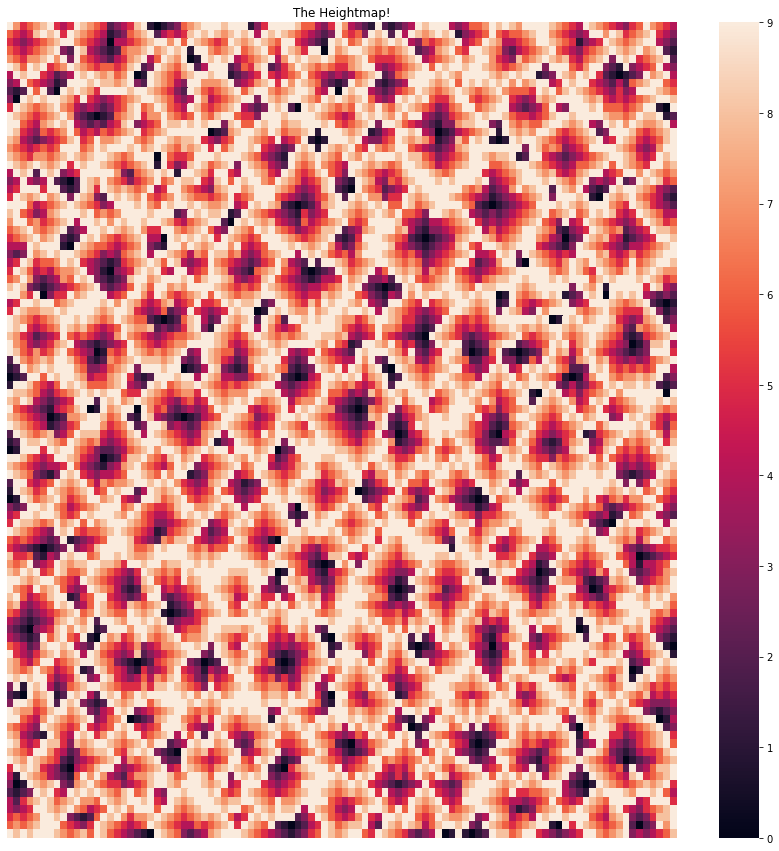

In [14]:
data_file = "../data/09_data.txt"

with open(data_file, "r") as f:
    puzzle_input = [line.rstrip("\n") for line in f]

for idx, numstr in enumerate(puzzle_input):
    puzzle_input[idx] = [int(char) for char in numstr]

puzzle_input = np.array(puzzle_input)

plt.figure(figsize = (15,15))

sns.heatmap(puzzle_input)

plt.xticks([])
plt.yticks([])

_ = plt.title("The Heightmap!")